In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('dataset/DTW_to_MIA.csv')

In [3]:
df.head()

,Unnamed: 0,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,3025,33ab2d66c35a58adae83b4bb77b6555d,2022-04-16,2022-04-17,DTW,MIA,TAA0AFEN,PT5H23M,0,False,...,1650207180||1650221280,2022-04-17T09:53:00.000-05:00||2022-04-17T14:4...,ORD||MIA,DTW||ORD,United||United,UA||UA,Embraer 175 (Enhanced Winglets)||Airbus A320,5280||10980,240||1192,coach||coach
1,3026,5010e23626217b0f804d98a5206fa2aa,2022-04-16,2022-04-17,DTW,MIA,TAA0AFEN,PT5H27M,0,False,...,1650194820||1650209220,2022-04-17T06:27:00.000-05:00||2022-04-17T11:2...,ORD||MIA,DTW||ORD,United||United,UA||UA,Embraer 175 (Enhanced Winglets)||Boeing 737 MAX 9,5220||10620,240||1192,coach||coach
2,3027,25c121aeaff0d241157fb8506c10813a,2022-04-16,2022-04-17,DTW,MIA,KNR,PT3H6M,0,False,...,1650212160,2022-04-17T12:16:00.000-04:00,MIA,DTW,Spirit Airlines,NK,AIRBUS INDUSTRIE A321 SHARKLETS,11160,None,coach
3,3028,1d3ebae67ae9480fcee93c02fb1f1063,2022-04-16,2022-04-17,DTW,MIA,QA0NA0MQ,PT2H58M,0,False,...,1650230220,2022-04-17T17:17:00.000-04:00,MIA,DTW,Delta,DL,Boeing 737-900,10680,1153,coach
4,3029,42908e992a3a24f214395c1826784b09,2022-04-16,2022-04-17,DTW,MIA,QA0NA0MQ,PT3H1M,0,False,...,1650210120,2022-04-17T11:42:00.000-04:00,MIA,DTW,Delta,DL,Airbus A321,10860,1153,coach


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289413 entries, 0 to 289412
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         289413 non-null  int64  
 1   legId                              289413 non-null  object 
 2   searchDate                         289413 non-null  object 
 3   flightDate                         289413 non-null  object 
 4   startingAirport                    289413 non-null  object 
 5   destinationAirport                 289413 non-null  object 
 6   fareBasisCode                      289413 non-null  object 
 7   travelDuration                     289413 non-null  object 
 8   elapsedDays                        289413 non-null  int64  
 9   isBasicEconomy                     289413 non-null  bool   
 10  isRefundable                       289413 non-null  bool   
 11  isNonStop                          2894

In [5]:
# only focus on nonstop flights and pick useful columns
df = df[df['isNonStop'] == True]
df = df.iloc[:,[2,3,7,8,9,10,12,14,15,17,19,22,24,27]]

In [6]:
# totalTravelDistance and isRefundable variables have no variance, so remove this column
print(df['totalTravelDistance'].value_counts())
print(df['isRefundable'].value_counts())
df.drop(['totalTravelDistance','isRefundable'], axis=1, inplace=True)
# Arrival time is decided by departure time and travel duration so it is redundant, remove it
df.drop(['segmentsArrivalTimeRaw'], axis=1, inplace=True)

1153.0    23727
Name: totalTravelDistance, dtype: int64
False    40131
Name: isRefundable, dtype: int64


In [7]:
df.shape

(40131, 11)

In [8]:
df.head()

,searchDate,flightDate,travelDuration,elapsedDays,isBasicEconomy,baseFare,seatsRemaining,segmentsDepartureTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsCabinCode
2,2022-04-16,2022-04-17,PT3H6M,0,False,140.00,0,2022-04-17T09:10:00.000-04:00,Spirit Airlines,AIRBUS INDUSTRIE A321 SHARKLETS,coach
3,2022-04-16,2022-04-17,PT2H58M,0,False,262.33,2,2022-04-17T14:19:00.000-04:00,Delta,Boeing 737-900,coach
4,2022-04-16,2022-04-17,PT3H1M,0,False,262.33,7,2022-04-17T08:41:00.000-04:00,Delta,Airbus A321,coach
5,2022-04-16,2022-04-17,PT3H8M,0,False,262.33,7,2022-04-17T12:52:00.000-04:00,American Airlines,Embraer 175,coach
6,2022-04-16,2022-04-17,PT3H9M,0,False,262.33,7,2022-04-17T06:00:00.000-04:00,American Airlines,Boeing 737-800,coach


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40131 entries, 2 to 289412
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   searchDate                    40131 non-null  object 
 1   flightDate                    40131 non-null  object 
 2   travelDuration                40131 non-null  object 
 3   elapsedDays                   40131 non-null  int64  
 4   isBasicEconomy                40131 non-null  bool   
 5   baseFare                      40131 non-null  float64
 6   seatsRemaining                40131 non-null  int64  
 7   segmentsDepartureTimeRaw      40131 non-null  object 
 8   segmentsAirlineName           40131 non-null  object 
 9   segmentsEquipmentDescription  39756 non-null  object 
 10  segmentsCabinCode             40131 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 3.4+ MB


## Deal with Missing Data

In [10]:
df.isna().sum()

searchDate                        0
flightDate                        0
travelDuration                    0
elapsedDays                       0
isBasicEconomy                    0
baseFare                          0
seatsRemaining                    0
segmentsDepartureTimeRaw          0
segmentsAirlineName               0
segmentsEquipmentDescription    375
segmentsCabinCode                 0
dtype: int64

In [11]:
df['segmentsEquipmentDescription'].value_counts()

Airbus A319                        19357
Boeing 737-900                      9401
Airbus A320                         4464
Boeing 737-800                      3910
Embraer 175                         1040
Boeing 757-300                       639
Airbus A321                          546
Boeing 757                           317
AIRBUS INDUSTRIE A320 SHARKLETS       76
AIRBUS INDUSTRIE A321 SHARKLETS        6
Name: segmentsEquipmentDescription, dtype: int64

In [12]:
# replace missing data with the mode
df['segmentsEquipmentDescription'] = df['segmentsEquipmentDescription'].fillna('Airbus A319')

## Change the Format of Some Variables

In [13]:
# travelDuration to min
dates = []
for date in df['travelDuration'].values:
    if date[4:-1] != '':
        dates.append(int(date[2])*60 + int(date[4:-1]))
    else:
        dates.append(int(date[2])*60)
df['travelDuration'] = dates

In [14]:
# change flightDate to Date type
df['flightDate'] = pd.to_datetime(df['flightDate'])

In [15]:
# change searchDate to the days before flight days
df['searchDaysBeforeDepartue'] = (df['flightDate']-pd.to_datetime(df['searchDate'])).dt.days.astype(int)
df.drop(['searchDate'], axis=1, inplace=True)

In [16]:
# change segmentsDepartureTimeRaw to minutes unit from 0 to 24*60
df['departureTimeInMin'] = [int(date[11:13])*60+int(date[14:16]) for date in df['segmentsDepartureTimeRaw'].values]
df.drop(['segmentsDepartureTimeRaw'], axis=1, inplace=True)

In [17]:
# rename some variables
df = df.rename(columns={"segmentsAirlineName": "airlineName", "segmentsEquipmentDescription": "equipmentDescription", 
                  "segmentsCabinCode": "cabinCode"})

In [18]:
df.head()

,flightDate,travelDuration,elapsedDays,isBasicEconomy,baseFare,seatsRemaining,airlineName,equipmentDescription,cabinCode,searchDaysBeforeDepartue,departureTimeInMin
2,2022-04-17,186,0,False,140.00,0,Spirit Airlines,AIRBUS INDUSTRIE A321 SHARKLETS,coach,1,550
3,2022-04-17,178,0,False,262.33,2,Delta,Boeing 737-900,coach,1,859
4,2022-04-17,181,0,False,262.33,7,Delta,Airbus A321,coach,1,521
5,2022-04-17,188,0,False,262.33,7,American Airlines,Embraer 175,coach,1,772
6,2022-04-17,189,0,False,262.33,7,American Airlines,Boeing 737-800,coach,1,360


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40131 entries, 2 to 289412
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   flightDate                40131 non-null  datetime64[ns]
 1   travelDuration            40131 non-null  int64         
 2   elapsedDays               40131 non-null  int64         
 3   isBasicEconomy            40131 non-null  bool          
 4   baseFare                  40131 non-null  float64       
 5   seatsRemaining            40131 non-null  int64         
 6   airlineName               40131 non-null  object        
 7   equipmentDescription      40131 non-null  object        
 8   cabinCode                 40131 non-null  object        
 9   searchDaysBeforeDepartue  40131 non-null  int64         
 10  departureTimeInMin        40131 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 3.

## EDA

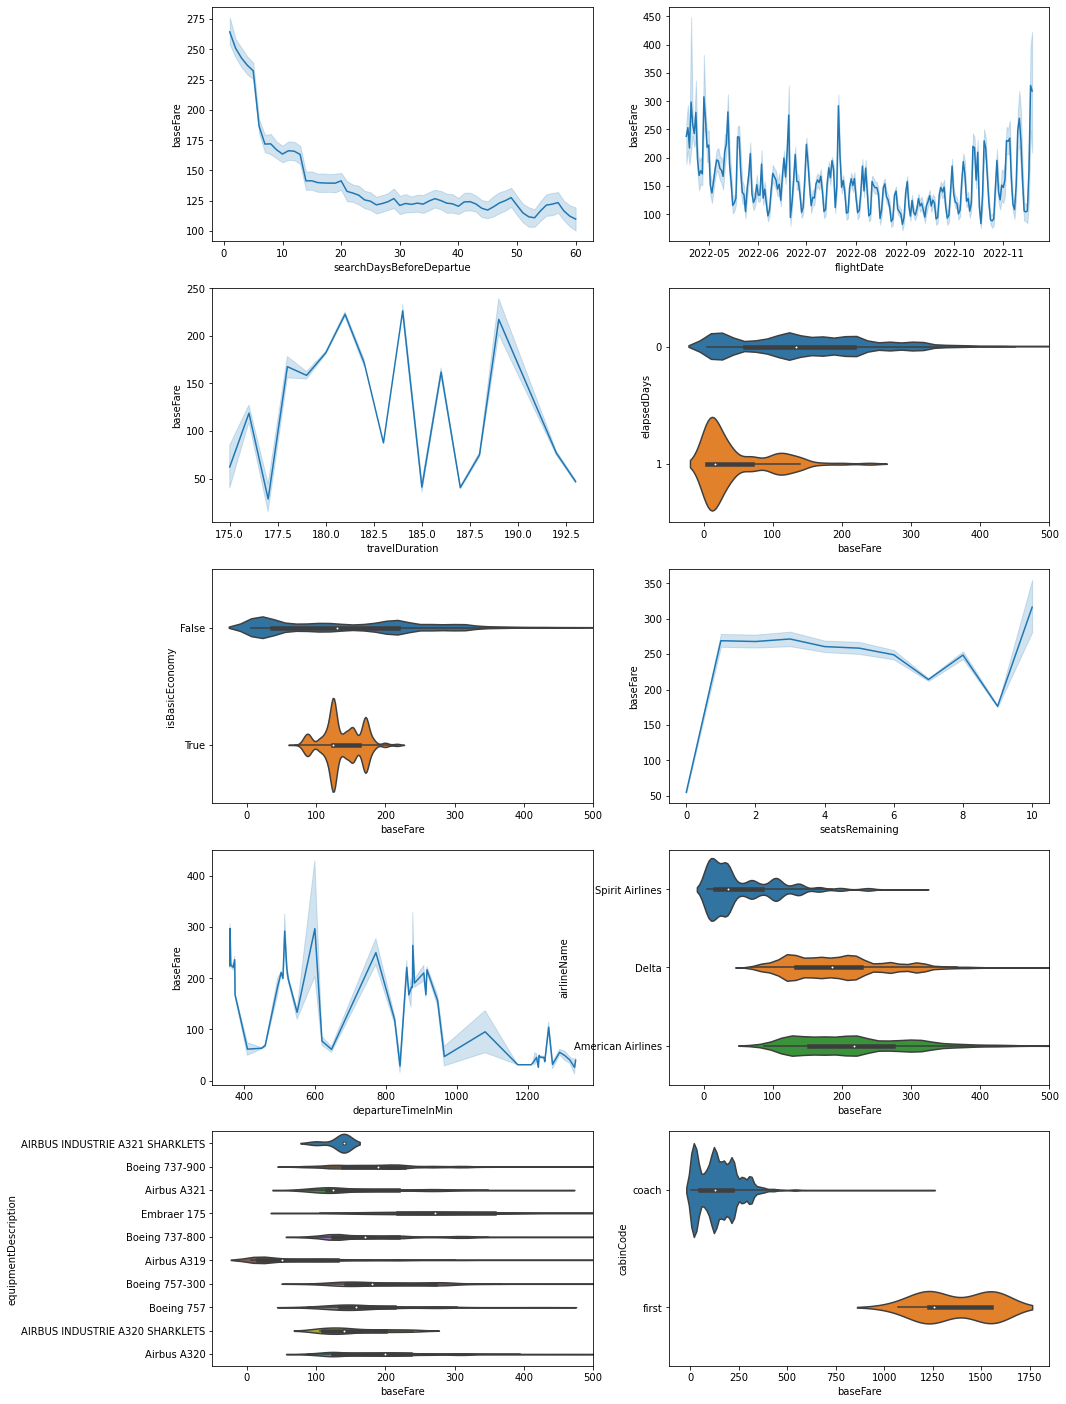

In [20]:
fig, axes = plt.subplots(5,2, figsize=(15,25))
sns.lineplot(ax=axes[0,0], x=df['searchDaysBeforeDepartue'], y=df['baseFare'])
sns.lineplot(ax=axes[0,1], x=df['flightDate'], y=df['baseFare'])
sns.lineplot(ax=axes[1,0], x=df['travelDuration'], y=df['baseFare'])
sns.violinplot(ax=axes[1,1], y=df['elapsedDays'].astype('category'), x=df['baseFare'])
axes[1,1].set_xlim(-50, 500)
sns.violinplot(ax=axes[2,0], y=df['isBasicEconomy'].astype('category'), x=df['baseFare'])
axes[2,0].set_xlim(-50, 500)
sns.lineplot(ax=axes[2,1], x=df['seatsRemaining'].astype('category'), y=df['baseFare'])
sns.lineplot(ax=axes[3,0], x=df['departureTimeInMin'].astype('category'), y=df['baseFare'])
sns.violinplot(ax=axes[3,1], y=df['airlineName'], x=df['baseFare'])
axes[3,1].set_xlim(-50, 500)
sns.violinplot(ax=axes[4,0], y=df['equipmentDescription'], x=df['baseFare'])
axes[4,0].set_xlim(-50, 500)
sns.violinplot(ax=axes[4,1], y=df['cabinCode'], x=df['baseFare'])
plt.show()

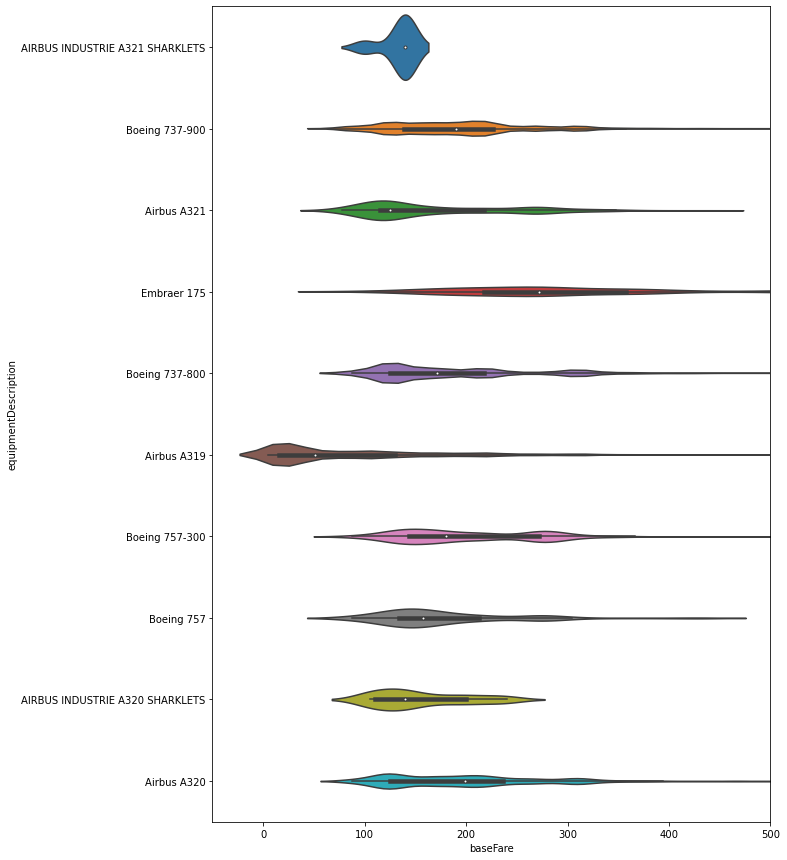

In [21]:
# equipmentDescription EDA not clear, replot it
plt.figure(figsize=(10,15))
sns.violinplot(y=df['equipmentDescription'], x=df['baseFare'])
plt.xlim(-50, 500)
plt.show()

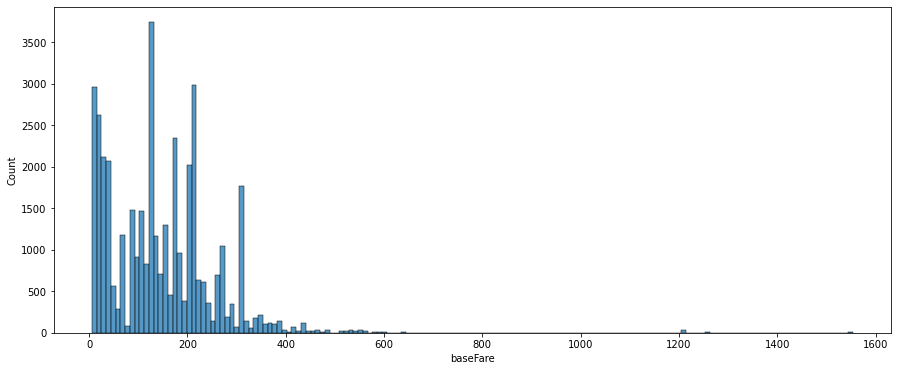

In [22]:
# response variable distribution
plt.figure(figsize=(15,6))
sns.histplot(df['baseFare'])
plt.show()

In [23]:
# For simplicity, combine some categories in the equipment description variable
df.loc[df['equipmentDescription']!='Airbus A319', 'equipmentDescription'] = "Other"

## One-Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
categorical_column = ['elapsedDays', 'isBasicEconomy', 'equipmentDescription', 'cabinCode', 'airlineName']
enc = OneHotEncoder(drop='if_binary')
df[categorical_column[:-1]] = csr_matrix.toarray(enc.fit_transform(df.loc[:,categorical_column[:-1]]))
df[['airlineName_'+str(i) for i in enc.categories_[0]]] = csr_matrix.toarray(enc.fit_transform(df.loc[:,['airlineName']]))
df.drop(['airlineName'], axis=1, inplace=True)                                                                           

In [27]:
df = df.rename(columns={"elapsedDays": "isOneElapsedDays", "equipmentDescription": "isOtherEquipment", 
                  "cabinCode": "isFirstCabin"})

In [28]:
df.head()

,flightDate,travelDuration,isOneElapsedDays,isBasicEconomy,baseFare,seatsRemaining,isOtherEquipment,isFirstCabin,searchDaysBeforeDepartue,departureTimeInMin,airlineName_American Airlines,airlineName_Delta,airlineName_Spirit Airlines
2,2022-04-17,186,0.0,0.0,140.00,0,1.0,0.0,1,550,0.0,0.0,1.0
3,2022-04-17,178,0.0,0.0,262.33,2,1.0,0.0,1,859,0.0,1.0,0.0
4,2022-04-17,181,0.0,0.0,262.33,7,1.0,0.0,1,521,0.0,1.0,0.0
5,2022-04-17,188,0.0,0.0,262.33,7,1.0,0.0,1,772,1.0,0.0,0.0
6,2022-04-17,189,0.0,0.0,262.33,7,1.0,0.0,1,360,1.0,0.0,0.0


In [ ]:
df.to_csv('cleanData.csv')

## Rolling Window Train-Test Split

In [ ]:
from sktime.forecasting.model_selection import SlidingWindowSplitter